In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn import linear_model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read CSV file
df= pd.read_csv('/content/drive/MyDrive/EY-predictive/data.csv')
print(df)

            id             datetime     machine   temp  noise  speed    rpm  \
0         5385     01-03-2022 00:00  Drumming 4  41.56  50.26  27.94  420.0   
1         5386     01-03-2022 00:01  Drumming 4  41.44  50.43  27.94   90.0   
2         5387     01-03-2022 00:02  Drumming 4  41.31  51.44  28.00   60.0   
3         5388     01-03-2022 00:03  Drumming 4  41.19  60.15  27.97  450.0   
4         5389     01-03-2022 00:04  Drumming 4  41.06  50.37  27.97   60.0   
...        ...                  ...         ...    ...    ...    ...    ...   
314751  320136  12/12/2022 05:53:01  Drumming 4  41.06  72.70   0.00   30.0   
314752  320137  12/12/2022 05:54:01  Drumming 4  41.06  72.70   0.00   30.0   
314753  320138  12/12/2022 05:55:01  Drumming 4  41.06  72.70   0.00   30.0   
314754  320139  12/12/2022 05:56:01  Drumming 4  41.06  72.70   0.00   30.0   
314755  320140  12/12/2022 05:57:01  Drumming 4  41.06  72.70   0.00   30.0   

        rms_velocity_x  rms_velocity_y  rms_velocit

In [ ]:
# km= KMeans(n_clusters=3)
# y_predicted= km.fit_predict()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314756 entries, 0 to 314755
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      314756 non-null  int64  
 1   datetime                314756 non-null  object 
 2   machine                 314756 non-null  object 
 3   temp                    314756 non-null  float64
 4   noise                   314756 non-null  float64
 5   speed                   314756 non-null  float64
 6   rpm                     314756 non-null  float64
 7   rms_velocity_x          314756 non-null  float64
 8   rms_velocity_y          314756 non-null  float64
 9   rms_velocity_z          314756 non-null  float64
 10  average_velocity_x      314756 non-null  float64
 11  average_velocity_y      314756 non-null  float64
 12  average_velocity_z      314756 non-null  float64
 13  rms_Acceleration_x      314756 non-null  float64
 14  rms_Acceleration_y  

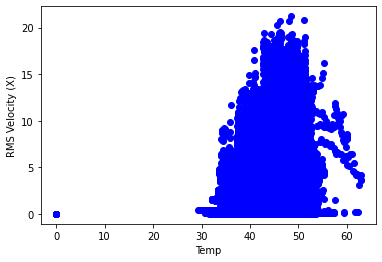

In [5]:
plt.scatter(df.temp, df.rms_velocity_x, c="blue")
# plt.title("Temp vs Horizontal Axis Velocity")
plt.xlabel("Temp")
plt.ylabel("RMS Velocity (X)")
plt.show()

In [ ]:
# regr = linear_model.LinearRegression()
# regr.fit(X, y)
# predictedCO2 = regr.predict([[20, 3.7, 2.95, 1.9]])
# print(predictedCO2)

LinearRegression()

In [6]:
# K-Means algorithm
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

X= df[['rms_velocity_x','rms_velocity_y','rms_velocity_z']]
kmeans = KMeans(4)
kmeans.fit(X)
identified_clusters = kmeans.fit_predict(X)
identified_clusters


array([3, 3, 3, ..., 0, 0, 0], dtype=int32)

In [7]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 
# plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')

In [8]:
data_with_clusters

,id,datetime,machine,temp,noise,speed,rpm,rms_velocity_x,rms_velocity_y,rms_velocity_z,...,average_velocity_z,rms_Acceleration_x,rms_Acceleration_y,rms_Acceleration_z,Average_Acceleration_x,Average_Acceleration_y,Average_Acceleration_z,created_on,updated_on,Clusters
0,5385,01-03-2022 00:00,Drumming 4,41.56,50.26,27.94,420.0,4.41,3.94,1.61,...,1.38,98.72,87.96,37.63,86.21,76.87,NaN,2022-03-17 11:00:25,2022-07-27 09:03:49,3
1,5386,01-03-2022 00:01,Drumming 4,41.44,50.43,27.94,90.0,4.26,3.81,1.61,...,1.39,95.29,85.17,37.43,83.22,74.25,NaN,2022-03-17 11:00:25,2022-07-27 09:03:49,3
2,5387,01-03-2022 00:02,Drumming 4,41.31,51.44,28.00,60.0,4.09,3.74,1.58,...,1.35,91.15,83.66,36.84,78.94,71.71,NaN,2022-03-17 11:00:25,2022-07-27 09:03:49,3
3,5388,01-03-2022 00:03,Drumming 4,41.19,60.15,27.97,450.0,3.89,3.66,1.54,...,1.31,86.73,82.04,35.68,75.34,69.46,NaN,2022-03-17 11:00:25,2022-07-27 09:03:49,3
4,5389,01-03-2022 00:04,Drumming 4,41.06,50.37,27.97,60.0,3.70,3.50,1.64,...,1.38,82.13,77.90,37.74,71.22,67.36,NaN,2022-03-17 11:00:25,2022-07-27 09:03:49,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314751,320136,12/12/2022 05:53:01,Drumming 4,41.06,72.70,0.00,30.0,0.40,0.06,0.04,...,0.03,8.28,1.21,0.93,8.25,0.99,0.73,2022-12-12 06:18:47,2022-12-12 06:18:47,0
314752,320137,12/12/2022 05:54:01,Drumming 4,41.06,72.70,0.00,30.0,0.40,0.06,0.04,...,0.03,8.28,1.21,0.93,8.25,0.99,0.73,2022-12-12 06:18:47,2022-12-12 06:18:47,0
314753,320138,12/12/2022 05:55:01,Drumming 4,41.06,72.70,0.00,30.0,0.40,0.06,0.04,...,0.03,8.28,1.21,0.93,8.25,0.99,0.73,2022-12-12 06:18:47,2022-12-12 06:18:47,0
314754,320139,12/12/2022 05:56:01,Drumming 4,41.06,72.70,0.00,30.0,0.40,0.06,0.04,...,0.03,8.28,1.21,0.93,8.25,0.99,0.73,2022-12-12 06:18:47,2022-12-12 06:18:47,0


In [15]:
data_with_clusters.drop(["rpm","noise", "average_velocity_x", "average_velocity_y", "average_velocity_z", "Average_Acceleration_x", "Average_Acceleration_y", "Average_Acceleration_z"], axis=1)

,id,datetime,machine,temp,speed,rms_velocity_x,rms_velocity_y,rms_velocity_z,rms_Acceleration_x,rms_Acceleration_y,rms_Acceleration_z,created_on,updated_on,Clusters
0,5385,01-03-2022 00:00,Drumming 4,41.56,27.94,4.41,3.94,1.61,98.72,87.96,37.63,2022-03-17 11:00:25,2022-07-27 09:03:49,3
1,5386,01-03-2022 00:01,Drumming 4,41.44,27.94,4.26,3.81,1.61,95.29,85.17,37.43,2022-03-17 11:00:25,2022-07-27 09:03:49,3
2,5387,01-03-2022 00:02,Drumming 4,41.31,28.00,4.09,3.74,1.58,91.15,83.66,36.84,2022-03-17 11:00:25,2022-07-27 09:03:49,3
3,5388,01-03-2022 00:03,Drumming 4,41.19,27.97,3.89,3.66,1.54,86.73,82.04,35.68,2022-03-17 11:00:25,2022-07-27 09:03:49,3
4,5389,01-03-2022 00:04,Drumming 4,41.06,27.97,3.70,3.50,1.64,82.13,77.90,37.74,2022-03-17 11:00:25,2022-07-27 09:03:49,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314751,320136,12/12/2022 05:53:01,Drumming 4,41.06,0.00,0.40,0.06,0.04,8.28,1.21,0.93,2022-12-12 06:18:47,2022-12-12 06:18:47,0
314752,320137,12/12/2022 05:54:01,Drumming 4,41.06,0.00,0.40,0.06,0.04,8.28,1.21,0.93,2022-12-12 06:18:47,2022-12-12 06:18:47,0
314753,320138,12/12/2022 05:55:01,Drumming 4,41.06,0.00,0.40,0.06,0.04,8.28,1.21,0.93,2022-12-12 06:18:47,2022-12-12 06:18:47,0
314754,320139,12/12/2022 05:56:01,Drumming 4,41.06,0.00,0.40,0.06,0.04,8.28,1.21,0.93,2022-12-12 06:18:47,2022-12-12 06:18:47,0


In [17]:
# Exporting df with clusters to csv file

data_with_clusters.to_csv("/content/drive/MyDrive/EY-predictive/Data_with_clusters.csv")


In [9]:
label0= data_with_clusters[data_with_clusters.Clusters==0]
label1= data_with_clusters[data_with_clusters.Clusters==1]
label2= data_with_clusters[data_with_clusters.Clusters==2]
label3= data_with_clusters[data_with_clusters.Clusters==3]

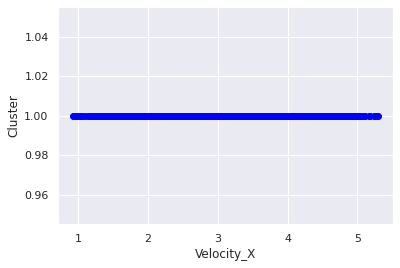

In [13]:
plt.scatter(label1['rms_velocity_z'], label1['Clusters'], c="blue")
plt.xlabel("Velocity_X")
plt.ylabel("Cluster")
plt.show()